### Import packages

In [18]:
import os
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.image as mpimg
from IPython.display import Image
import yaml

### Set directory

In [2]:
directory='/Users/saroltagabulya/git/Orca/'
folders=os.listdir(directory+'call_segments/')
file=[]

In [3]:
dropdown=widgets.Dropdown(
    options=folders,
    description='Choose folder:',
    disabled=False,
)

def dropdown_eventhandler(change):
    file.clear()
    file.append(change.new)
    print(change.new)
dropdown.observe(dropdown_eventhandler, names='value')
display(dropdown)

Dropdown(description='Choose folder:', options=('.DS_Store', '2017-02-04--10-25-15--00-05-25--C', '.ipynb_chec…

2017-02-04--10-25-15--00-05-25--C


In [4]:
os.chdir(directory + 'call_segments/' +file[0])
pngs=glob.glob('*.png')
pngs.sort()

In [5]:
for e in list(range(len(pngs))):
    if 'preview'in  pngs[e]:
        pngs.remove(pngs[e])
pngs

['2017-02-04--10-28-03--00-00-01--C.png',
 '2017-02-04--10-28-08--00-00-04--C.png',
 '2017-02-04--10-28-15--00-00-03--C.png',
 '2017-02-04--10-28-22--00-00-04--C.png',
 '2017-02-04--10-28-36--00-00-03--C.png',
 '2017-02-04--10-28-45--00-00-03--C.png',
 '2017-02-04--10-29-32--00-00-04--C.png',
 '2017-02-04--10-29-52--00-00-03--C.png',
 '2017-02-04--10-29-58--00-00-03--C.png',
 '2017-02-04--10-30-18--00-00-04--C.png']

### Read in spect meta

In [26]:
with open('spect_meta.yml', 'r') as stream:
    data_loaded = yaml.safe_load(stream)

hop_length=data_loaded['hop_length']
win_length=data_loaded['win_length']
nfft=data_loaded['nfft']
sample_rate=data_loaded['sample_rate']

### Create overview from existing spectograms 

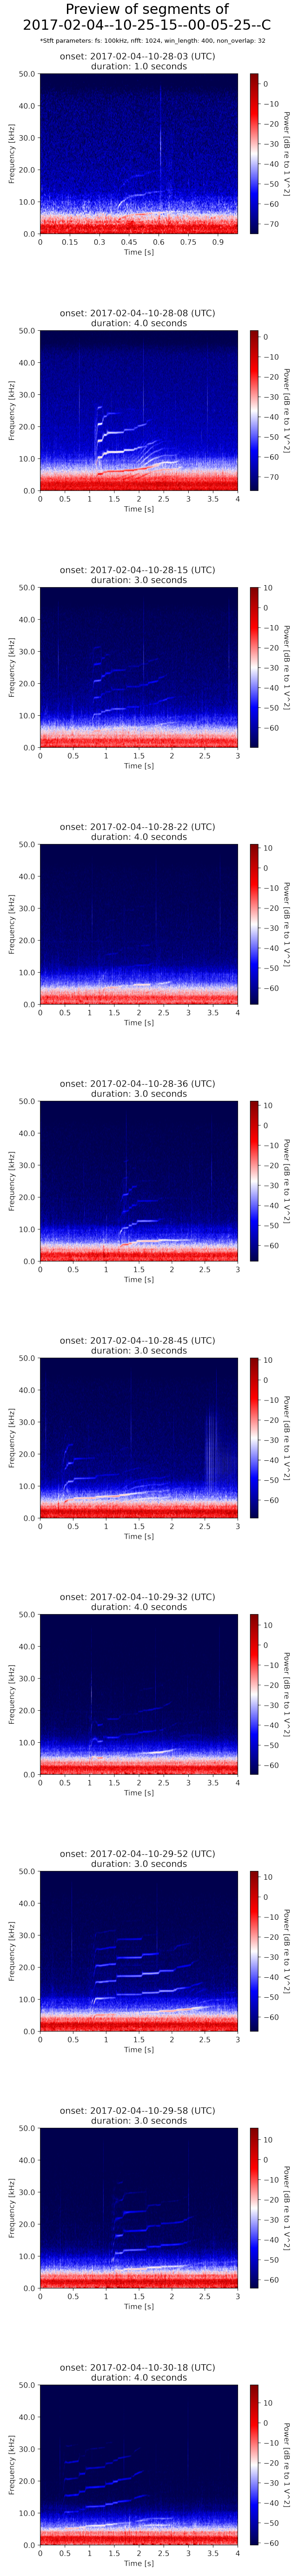

In [52]:
fig=plt.figure(figsize=(100,100))  

for p in list(range(len(pngs))):
    
    #Add title
    if p==1:
        plt.title('Preview of segments of \n{} \n'.format(file[0]), fontsize=30)
        #plt.suptitle('Short time Fourrier Transform parameters: \n fs: {}Hz, nfft: {}, win_length: {}, non_overlap: {}'.format(sample_rate, nfft, win_length, hop_length), fontsize=18)
        plt.annotate('\n *Stft parameters: fs: {}kHz, nfft: {}, win_length: {}, non_overlap: {}\n \n \n'.format(int(sample_rate/1000), nfft, win_length, hop_length), 
                     xy = (0.9, 1.0 ), xycoords='axes fraction', ha='right', va="center", fontsize=13)
        
    pic=pngs[p]
    img = mpimg.imread(pic)
    fig.add_subplot(len(pngs),1,p+1)
    plt.imshow(img)
    plt.axis('off')


# Save spectograms
plt.savefig('preview_'+ file[0], bbox_inches='tight', dpi=200, facecolor='White' )


plt.show()
plt.close()